In [1]:
import rasterio
import numpy as np
import os
import glob

In [1]:
# Load Prob_Image class that was defined in ProbImage_CLass.ipynb
%run ProbImage_Class.ipynb

In [2]:
# find all tifs in the dir
dirpath = r"/media/sitian/HDD1/BULCU_TIFFS/BULCU_Refine_GFSAD/BULCU_tiles/"
search_criteria = "*.tif"
q = os.path.join(dirpath, search_criteria)
tif_fps = glob.glob(q)

In [3]:
len(tif_fps)

1466

In [5]:
# refine and export
for i in range(len(tif_fps)):
    print(i)   
    j = 'refined' + tif_fps[i].split('/')[-1]

    refine_tile = Prob_Image(tif_fps[i])

    # let refine_tile to get refined image
    refine_tile.mask_slope_image(0.8, -0.1)

    # update refined image meta to have only 1 band
    refine_tile.update_out_meta({'count':1})

    # output
    refine_tile.write_refined_GFSAD('/media/sitian/HDD1/BULCU_TIFFS/BULCU_Refine_GFSAD/Refined_tiles',j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [18]:
# refine and export use init_threshold = 0.7 and slope >-0.1
for i in range(len(tif_fps)):
    if i%200 ==0:
        print(i)
    j = 'refined' + tif_fps[i].split('/')[-1]

    refine_tile = Prob_Image(tif_fps[i])

    # let refine_tile to get refined image
    refine_tile.mask_slope_image(0.7, -0.1)

    # update refined image meta to have only 1 band
    refine_tile.update_out_meta({'count':1})

    # output
    refine_tile.write_refined_GFSAD('/media/sitian/HDD1/BULCU_TIFFS/BULCU_Refine_GFSAD/Refined_tiles_2',j)

0
200
400
600
800
1000
1200
1400


In [16]:
# also export the crop probability layers
for i in range(len(tif_fps)):
    print(i)   
    j = 'Crop_' + tif_fps[i].split('/')[-1]

    Prob_tile = Prob_Image(tif_fps[i])

    # update refined image meta to have only 1 band
    Prob_tile.update_out_meta({'count':6, 'dtype':'float64'})

    # output
    Prob_tile.write_crop_stack('/media/sitian/HDD1/BULCU_TIFFS/BULCU_Refine_GFSAD/Cropprob',j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## For debug-ing ...


In [2]:
test1 = Prob_Image('/media/sitian/HDD1/BULCU_TIFFS/BULCU_Refine_GFSAD/BULCU_tiles/grid_1360_BULCU.tif')
test2 = Prob_Image('/media/sitian/HDD1/BULCU_TIFFS/BULCU_Refine_GFSAD/BULCU_tiles/grid_29_BULCU.tif')

In [295]:
test1.write_refined_GFSAD('/media/sitian/HDD1/BULCU_TIFFS/BULCU_Refine_GFSAD/Refined_tiles','test_1360.tif')

In [3]:
test1.meta_data

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 870,
 'height': 732,
 'count': 12,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0002694945852358564, 0.0, 27.15023198958636,
        0.0, -0.0002694945852358564, -16.106074392035726)}

TypeError: Image data of dtype object cannot be converted to float

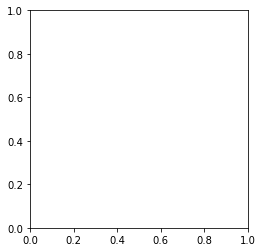

In [5]:
from matplotlib import pyplot

pyplot.imshow(test1.mask_slope_image(0.7, -0.1), cmap='pink')
pyplot.show()

In [8]:
print(test1.slope_image)

[[ 1.20495113e-02 -1.39147287e-01 -1.39147287e-01 ... -1.05135114e-02
  -1.05135114e-02 -1.39244949e-01]
 [-1.39315144e-01  1.20495113e-02  1.20495113e-02 ... -1.38566545e-01
  -1.44389655e-01 -1.38566545e-01]
 [-1.39315144e-01 -1.44389655e-01  1.20495113e-02 ... -1.40923518e-01
   1.38777878e-17  1.38777878e-17]
 ...
 [ 5.83313714e-03  5.83313714e-03  1.38777878e-17 ...  5.74637473e-04
   1.44487753e-03  1.44487753e-03]
 [ 1.05143834e-02 -1.40923518e-01 -1.42102005e-01 ...  5.74637473e-04
   5.74637473e-04  5.74637473e-04]
 [-1.40923518e-01 -1.42102005e-01 -1.40923518e-01 ...  5.74637473e-04
   5.09238671e-04  5.74637473e-04]]


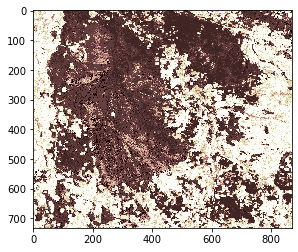

In [17]:
pyplot.imshow(test1.init_crop_prob, cmap='pink')
pyplot.show()

In [30]:
import gdal
import numpy as np

fp = '/media/sitian/HDD1/BULCU_TIFFS/BULCU_grid2500_2016backward/BULCU-81-93_2016_backward/grid_81_BULCU.tif'
dataset = gdal.Open(fp)
image = dataset.ReadAsArray()

image_cropprob = image[1::2,:]/65532 # select every other odd row
row = image_cropprob.shape[1]
col = image_cropprob.shape[2]
band_num = image_cropprob.shape[0]
image_cropprob_flat = image_cropprob.transpose(2,1,0).reshape(row*col,band_num)

In [32]:
image_cropprob_flat.shape

(636108, 16)

In [ ]:

#slope_thresh=-0.03





result = shapelet_2d(image_cropprob_flat,3)
shapelet_image = result[0].reshape(col,row).transpose(1,0)

ts_len = image_cropprob_flat.shape[1]
time_step = np.arange(ts_len)

a = linear_fit(time_step, image_cropprob_flat)
a_image = a.reshape(col,row).transpose(1,0)

a_image[a_image>slope_thresh] =0  #-0.03
a_image[a_image<=slope_thresh] =1